<a href="https://colab.research.google.com/github/dayanakhadijah/DLCV-Workshop-Assignment-1/blob/main/DLCV_Assign1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Getting Face Image from Webcam**
Captures the image from webcam and then saves it into a folder in google drive to use it later.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='Face.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
  pic = cv2.imread("Face.jpg")

except Exception as err:
  print(str(err))

In [ ]:
path = "/content/gdrive/MyDrive/DLCV_ASSIGNMENT 1/FACE PICS/"

In [ ]:
cv2.imwrite(path+"Face1.jpg", pic)

True

In [ ]:
cv2.imwrite(path+"Face2.jpg", pic)

True

In [ ]:
cv2.imwrite(path+"Face3.jpg", pic)

True

**Canny Edge Detection** Applied only to the face area.

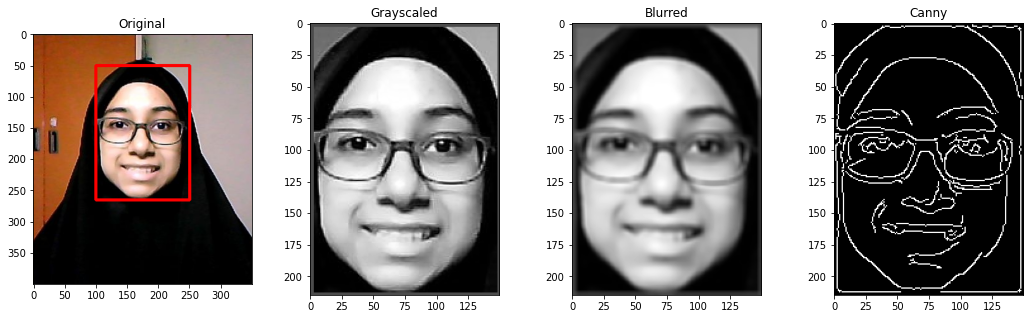

In [ ]:
#face1 image
face1_bgr= cv2.imread(path+"Face1.jpg")
face1 = cv2.cvtColor(face1_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face1 = face1[0:400, 150:500]
#focus on face
face1_boxed = cv2.rectangle(cropped_face1,(100,50),(250,265),(255,0,0),3)
cropped_face1_boxed = face1_boxed[50:265, 100:250]
#canny edge
face1_gray = cv2.cvtColor(cropped_face1_boxed, cv2.COLOR_RGB2GRAY)
face1_blur = cv2.GaussianBlur(face1_gray, (5,5), 3)
face1_canny = cv2.Canny(face1_blur, 30, 150, 3)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face1); plt.title("Original");
plt.subplot(142); plt.imshow(face1_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face1_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face1_canny, cmap='gray'); plt.title("Canny");

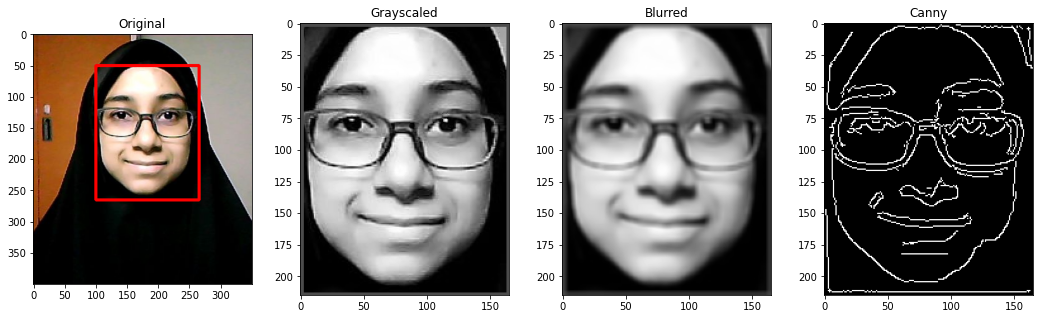

In [ ]:
#face2 image
face2_bgr= cv2.imread(path+"Face2.jpg")
face2 = cv2.cvtColor(face2_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face2 = face2[0:400, 150:500]
#focus on face
face2_boxed = cv2.rectangle(cropped_face2,(100,50),(265,265),(255,0,0),3)
cropped_face2_boxed = face2_boxed[50:265, 100:265]
#canny edge
face2_gray = cv2.cvtColor(cropped_face2_boxed, cv2.COLOR_RGB2GRAY)
face2_blur = cv2.GaussianBlur(face2_gray, (5,5), 5)
face2_canny = cv2.Canny(face2_blur, 30, 150, 3)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face2, cmap='gray'); plt.title("Original");
plt.subplot(142); plt.imshow(face2_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face2_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face2_canny, cmap='gray'); plt.title("Canny");

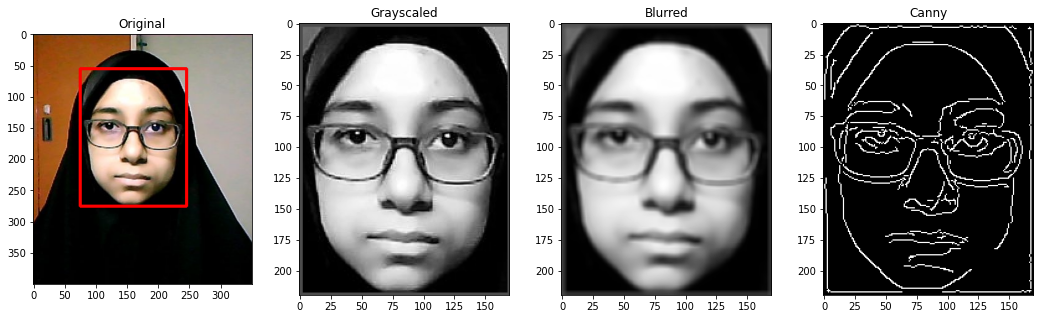

In [ ]:
#face3 image
face3_bgr= cv2.imread(path+"Face3.jpg")
face3 = cv2.cvtColor(face3_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face3 = face3[0:400, 150:500]
#focus on face
face3_boxed = cv2.rectangle(cropped_face3,(75,55),(245,275),(255,0,0),3)
cropped_face3_boxed = face3_boxed[55:275, 75:245]
#canny edge
face3_gray = cv2.cvtColor(cropped_face3_boxed, cv2.COLOR_RGB2GRAY)
face3_blur = cv2.GaussianBlur(face3_gray, (5,5), 5)
face3_canny = cv2.Canny(face3_blur, 30, 150, 3)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face3, cmap='gray'); plt.title("Original");
plt.subplot(142); plt.imshow(face3_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face3_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face3_canny, cmap='gray'); plt.title("Canny");

**Sobel Edge Detection** Applied to the face area.

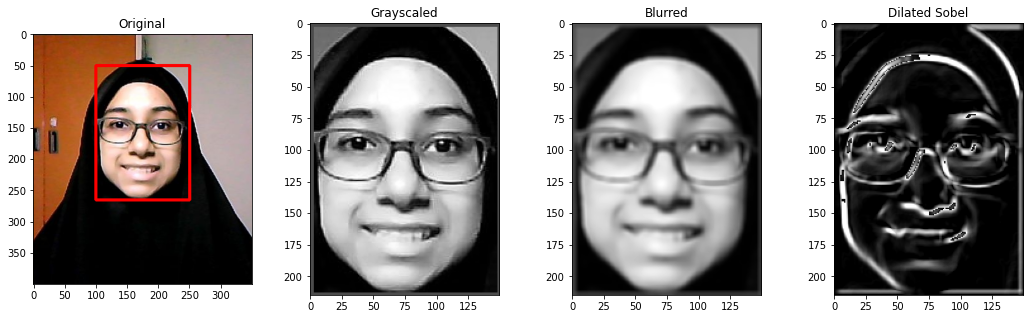

In [ ]:
#face1 image
face1_bgr= cv2.imread(path+"Face1.jpg")
face1 = cv2.cvtColor(face1_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face1 = face1[0:400, 150:500]
#focus on face
face1_boxed = cv2.rectangle(cropped_face1,(100,50),(250,265),(255,0,0),3)
cropped_face1_boxed = face1_boxed[50:265, 100:250]
#sobel edge
face1_gray = cv2.cvtColor(cropped_face1_boxed, cv2.COLOR_RGB2GRAY)
face1_blur = cv2.GaussianBlur(face1_gray, (5,5), 3)
sobelx = cv2.Sobel(face1_blur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(face1_blur, cv2.CV_8U,0,1,ksize=3)
face1_sobel = sobelx + sobely
#dilation
face1_dilation = cv2.dilate(face1_sobel, (5,5), iterations=5)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face1, cmap='gray'); plt.title("Original");
plt.subplot(142); plt.imshow(face1_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face1_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face1_sobel, cmap='gray'); plt.title("Dilated Sobel");

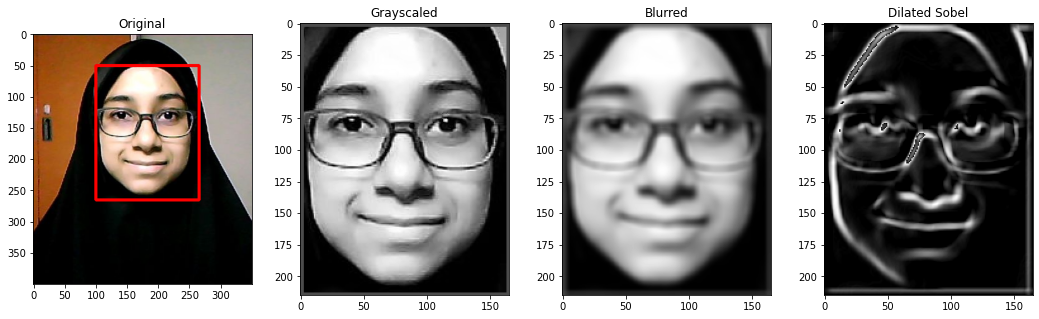

In [ ]:
#face2 image
face2_bgr= cv2.imread(path+"Face2.jpg")
face2 = cv2.cvtColor(face2_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face2 = face2[0:400, 150:500]
#focus on face
face2_boxed = cv2.rectangle(cropped_face2,(100,50),(265,265),(255,0,0),3)
cropped_face2_boxed = face2_boxed[50:265, 100:265]
#sobel edge
face2_gray = cv2.cvtColor(cropped_face2_boxed, cv2.COLOR_RGB2GRAY)
face2_blur = cv2.GaussianBlur(face2_gray, (7,7), 3)
sobelx = cv2.Sobel(face2_blur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(face2_blur, cv2.CV_8U,0,1,ksize=3)
face2_sobel = sobelx + sobely
#dilation
face2_dilation = cv2.dilate(face2_sobel, (2,2), iterations=3)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face2, cmap='gray'); plt.title("Original");
plt.subplot(142); plt.imshow(face2_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face2_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face2_sobel, cmap='gray'); plt.title("Dilated Sobel");

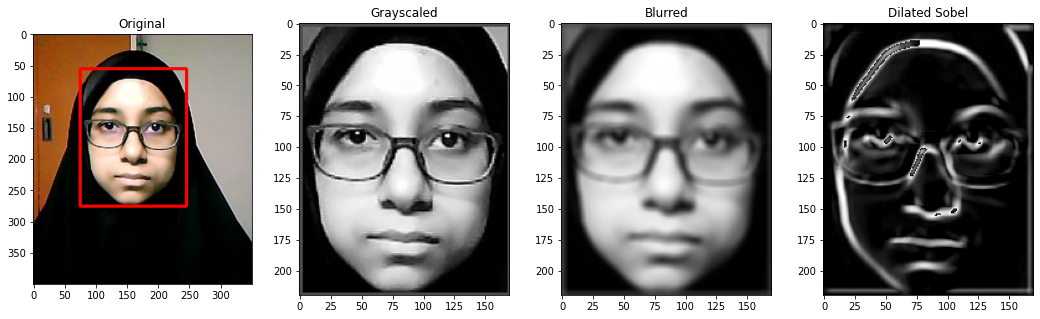

In [ ]:
#face3 image
face3_bgr= cv2.imread(path+"Face3.jpg")
face3 = cv2.cvtColor(face3_bgr, cv2.COLOR_BGR2RGB)
#crop image
cropped_face3 = face3[0:400, 150:500]
#focus on face
face3_boxed = cv2.rectangle(cropped_face3,(75,55),(245,275),(255,0,0),3)
cropped_face3_boxed = face3_boxed[55:275, 75:245]
#sobel edge
face3_gray = cv2.cvtColor(cropped_face3_boxed, cv2.COLOR_RGB2GRAY)
face3_blur = cv2.GaussianBlur(face3_gray, (7,7), 3)
sobelx = cv2.Sobel(face3_blur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(face3_blur, cv2.CV_8U,0,1,ksize=3)
face3_sobel = sobelx + sobely
#dilation
face3_dilation = cv2.dilate(face3_sobel, (2,2), iterations=3)

plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(cropped_face3, cmap='gray'); plt.title("Original");
plt.subplot(142); plt.imshow(face3_gray, cmap='gray'); plt.title("Grayscaled");
plt.subplot(143); plt.imshow(face3_blur, cmap='gray'); plt.title("Blurred");
plt.subplot(144); plt.imshow(face3_sobel, cmap='gray'); plt.title("Dilated Sobel");